# Exploratory Analysis of Employee Attrition Trends
By: Tania Green

## Introduction

In this project, I explored an HR dataset to identify the factors associated with employee attrition. The goal is to uncover patterns that can help organizations better understand what drives attrition and whether these contributing factors vary across departments.

**Research question:** 
Which departments experience the highest attrition, and what employee-level factors may be contributing to this trend?

**Target:** `Attrition` - whether or not an employee has left the company

**Dataset Source:**
IBM HR Analytics Employee Attrition & Performance<br>
[Kaggle Dataset Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

### Field Definitions

* **Age:** Age of the employee
* **Attrition:** Whether the employee left the company (Yes or No)
* **BusinessTravel:** Frequency of business travel
* **DailyRate:** Base pay
* **Department:** Department: Sales, Research & Development, or Human Resources
* **DistanceFromHome:** Distance from home to workplace (in km)
* **Education:** Coded from 1 to 5: 1 = 'Below College', 2 = 'College', 3 = 'Bachelor', 4 = 'Master', 5 = 'Doctor'
* **EducationField:** Field of study (e.g., Life Sciences, Medical, Technical Degree)
* **EmployeeCount:** Always 1
* **EmployeeNumber:** Unique identifier for each employee
* **EnvironmentSatisfaction:** Satisfaction with work environment (1 = Low to 4 = Very High)
* **Gender:** Male or Female
* **HourlyRate:** Base pay
* **JobInvolvement:** Employee’s level of involvement (1 to 4)
* **JobLevel:** Level of the job in the organization (1 to 5)
* **JobRole:** Employee's job title
* **JobSatisfaction:** Satisfaction with job (1 = Low to 4 = Very High)
* **MaritalStatus:** Marital status (Single, Married, Divorced)
* **MonthlyIncome:** Monthly salary
* **MonthlyRate:** Base pay
* **NumCompaniesWorked:** Number of companies employee has worked for
* **Over18:** Always Y
* **OverTime:** Whether the employee works overtime (Yes or No)
* **PercentSalaryHike:** Percent salary increase
* **PerformanceRating:** Performance rating (1 = Low, 4 = Outstanding)
* **RelationshipSatisfaction:** Satisfaction with coworkers (1–4)
* **StandardHours:** Always 80
* **StockOptionLevel:** Stock options level (0–3)
* **TotalWorkingYears:** Total years of professional experience
* **TrainingTimesLastYear:** How many times the employee had training.
* **WorkLifeBalance:** Work-life balance rating (1 = Bad to 4 = Best)
* **YearsAtCompany:** Number of years at the current company
* **YearsInCurrentRole:** Number of years in current role
* **YearsSinceLastPromotion:** Number of years since last promotion
* **YearsWithCurrManager:** Number of years with current manager

## Data Assessment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
hr_dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
hr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
hr_dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
# checking for missing values in each column
hr_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
all_columns = hr_dataset.columns.tolist()

# adding a for loop to print all the unique values in each column
for col in all_columns:
    print(f"/nColumn: {col}")
    print(hr_dataset[col].unique())

/nColumn: Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
/nColumn: Attrition
['Yes' 'No']
/nColumn: BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
/nColumn: DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857

The following columns are coded variables:

- Education
- EnvironmentSatisfaction
- JobInvolvement
- JobSatisfaction
- PerformanceRating
- RelationshipSatisfaction
- WorkLifeBalance

In [7]:
duplicate_employees = hr_dataset['EmployeeNumber'].duplicated().sum()
print(f"Number of duplicate EmployeeNumbers: {duplicate_employees}")

Number of duplicate EmployeeNumbers: 0


## Data Assessment Summary

In this section, I assessed the dataset by reviewing its structure and data types. All fields used appropriate data types, and no null values were present. Some variables were coded numerically (e.g., satisfaction scores, education levels), which can be converted to labeled categories for improved interpretability in charts. There were no relevant duplicate records, such as duplicate employee entries.

## Data Cleaning and Transformation

In [8]:
# removing the coolumns not needed for analysis
hr_dataset = hr_dataset[['Age', 'Attrition', 'BusinessTravel', 
            #'DailyRate', 
            'Department',
       'DistanceFromHome', 'Education', 
            #'EducationField',
        'EmployeeCount',
       #'EmployeeNumber', 'EnvironmentSatisfaction', 
        'Gender', #'HourlyRate',
      # 'JobInvolvement',
            'JobLevel', 
            #'JobRole', 'JobSatisfaction',
       #'MaritalStatus', 
        'MonthlyIncome', #'MonthlyRate', 'NumCompaniesWorked',
      # 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
      # 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', #'TrainingTimesLastYear', 
        'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].copy()

In [9]:
hr_dataset.shape

(1470, 16)

In [10]:
hr_dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'Gender', 'JobLevel', 'MonthlyIncome',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
hr_dataset["New_Attrition_Value"] = hr_dataset["Attrition"].map({"No": 0, "Yes": 1})

In [12]:
hr_dataset["Education_Labels"] = hr_dataset["Education"].map({1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"})

In [13]:
hr_dataset["WorkLifeBalance_Labels"] = hr_dataset["WorkLifeBalance"].map({1: "Bad", 2: "Good", 3: "Better", 4: "Best"})

In [14]:
overall_avg_attrition = hr_dataset['New_Attrition_Value'].mean()
print(f"Overall Attrition Rate: {overall_avg_attrition:.2%}")

Overall Attrition Rate: 16.12%


### Data Cleaning and Transformation Summary

In this section, columns that were not relevant to identifying department-level attrition trends were removed. Categorical string labels in the Attrition column were mapped to numeric values to allow for rate calculations. Additionally, numerical codes in columns such as Education and WorkLifeBalance were mapped to descriptive labels to improve interpretability in charts and summaries.

## Univariate Analysis

In [15]:
hr_dataset['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Text(0.5, 1.0, 'Attrition Distribution')

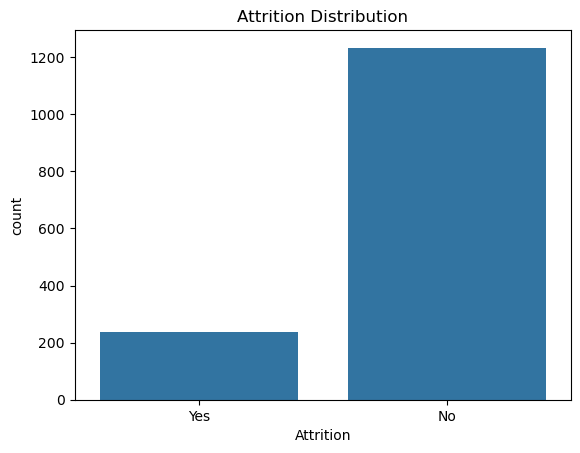

In [16]:
sns.countplot(data=hr_dataset, x="Attrition")
plt.title("Attrition Distribution")

Text(0.5, 1.0, 'Age Distribution')

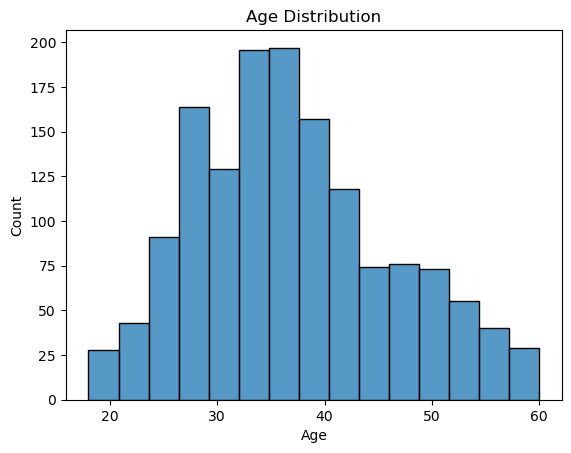

In [17]:
sns.histplot(data=hr_dataset, x="Age", bins=15)
plt.title("Age Distribution")

Text(0.5, 1.0, 'Education Level Distribution')

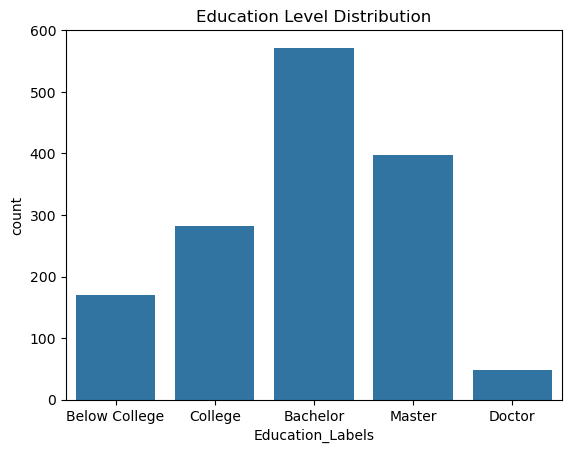

In [18]:
sns.countplot(data=hr_dataset, x="Education_Labels", order=["Below College", "College", "Bachelor", "Master", "Doctor"])
plt.title("Education Level Distribution")

In [19]:
dept_counts = hr_dataset['Department'].value_counts()
print(dept_counts)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [20]:
dept_proportions = hr_dataset['Department'].value_counts(normalize=True)
print(dept_proportions)

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Employees by Department')

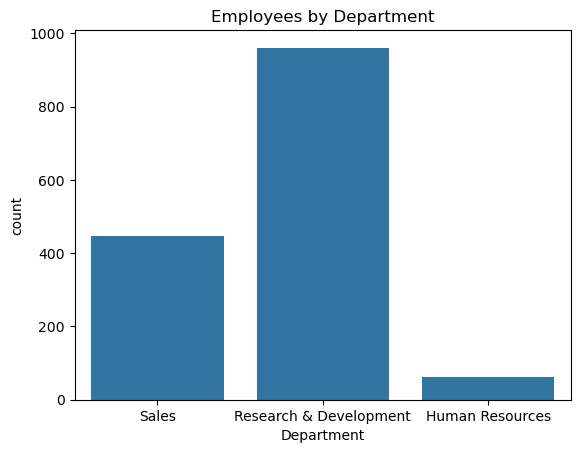

In [21]:
sns.countplot(data=hr_dataset, x="Department")
plt.title("Employees by Department")

### Univariate Analysis Summary

Univariate analysis revealed that more employees stay with the company than leave. The age distribution is well spread, ranging from 18 to 60 years old, with an average age of 37. Most employees hold a Bachelor's degree. 

The organization is divided into three departments: Sales, Research & Development, and Human Resources. The Research & Development department has the largest headcount, accounting for approximately 65% of the workforce.


## Bivariate Analysis

In [22]:
# Calculate attrition rate per department
attrition_by_dept = hr_dataset.groupby('Department')['New_Attrition_Value'].mean().sort_values(ascending=False)

In [23]:
print(attrition_by_dept)

Department
Sales                     0.206278
Human Resources           0.190476
Research & Development    0.138398
Name: New_Attrition_Value, dtype: float64


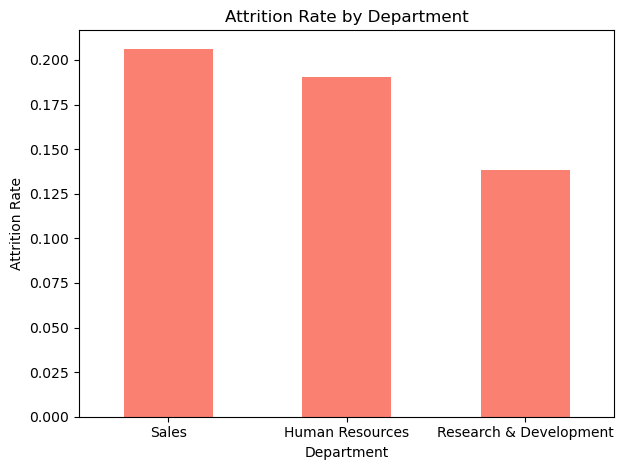

In [24]:
attrition_by_dept.plot(kind='bar', color='salmon')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [25]:
# Number of employees who left, by department
attrition_counts = hr_dataset[hr_dataset['Attrition'] == 'Yes']['Department'].value_counts()
print(attrition_counts)

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: count, dtype: int64


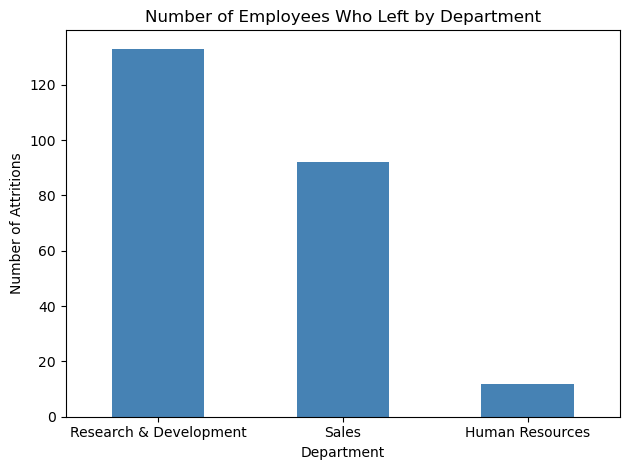

In [26]:
attrition_counts.plot(kind='bar', color='steelblue')
plt.title("Number of Employees Who Left by Department")
plt.ylabel("Number of Attritions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

While the Sales department has the highest attrition rate, the Research & Development department accounts for the highest number of total employee departures. This is primarly due to its larger size within the organization. Given the elevated attrition rates in sales, the next step is to explore which employee-level factors may be contributing to this trend. 

In [27]:
# creating a dataframe consisting of only emloyees in the sales dept
sales_employees = hr_dataset[hr_dataset["Department"] == "Sales"]

In [28]:
def create_boxplot(data, x, y, title, xlabel=None, ylabel=None, palette="Set2"):
    """
    Creates a boxplot with consistent styling.
    
    Parameters:
    - data: DataFrame to use
    - x: column name for x-axis (usually 'Attrition')
    - y: column name for y-axis (numeric variable)
    - title: chart title
    - xlabel: optional custom x-axis label
    - ylabel: optional custom y-axis label
    - palette: seaborn color palette
    """
    sns.boxplot(data=data, x=x, y=y, hue=x, palette=palette, dodge=False)
    plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.legend([], [], frameon=False)
    plt.show()

In [29]:
sales_employees.groupby("Attrition")["Age"].median()

Attrition
No     36.0
Yes    32.5
Name: Age, dtype: float64

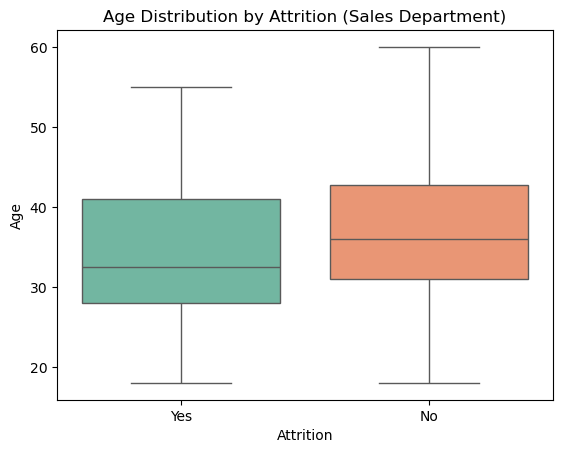

In [30]:
create_boxplot(data=sales_employees, x="Attrition", y="Age", title="Age Distribution by Attrition (Sales Department)", ylabel="Age")

In the Sales department, employees who left had a median age of 32.5, compared to 36.0 for those who stayed. This suggests that younger employees may be more likely to leave the company.

In [31]:
sales_grouped = sales_employees.groupby("Attrition")["MonthlyIncome"].median()
print(sales_grouped)

Attrition
No     6073.5
Yes    5314.0
Name: MonthlyIncome, dtype: float64


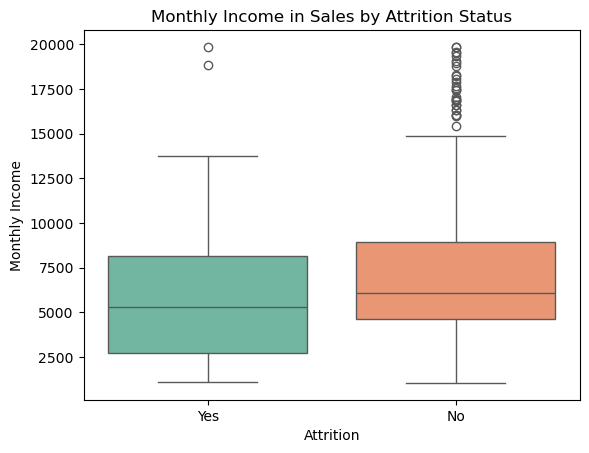

In [32]:
create_boxplot(data=sales_employees, x="Attrition", y="MonthlyIncome", title="Monthly Income in Sales by Attrition Status", ylabel="Monthly Income")

The median monthly income for Sales employees who left was approximately $760 less than who who stayed, indiciating that lower income may be a contributing factor to attrition in this department.

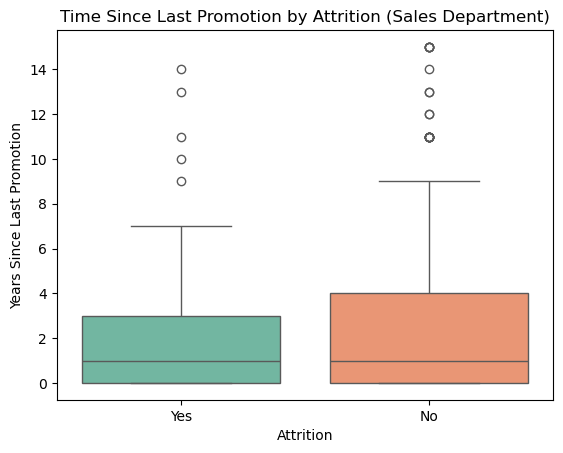

In [33]:
create_boxplot(data=sales_employees, x="Attrition", y="YearsSinceLastPromotion", title="Time Since Last Promotion by Attrition (Sales Department)", ylabel="Years Since Last Promotion")

Time since last promotion does not appear to have a significant impact on employee attrition in the Sales department. Both employees who left and those who stayed have similar distributions, with most having been promoted within the last 0–2 years.

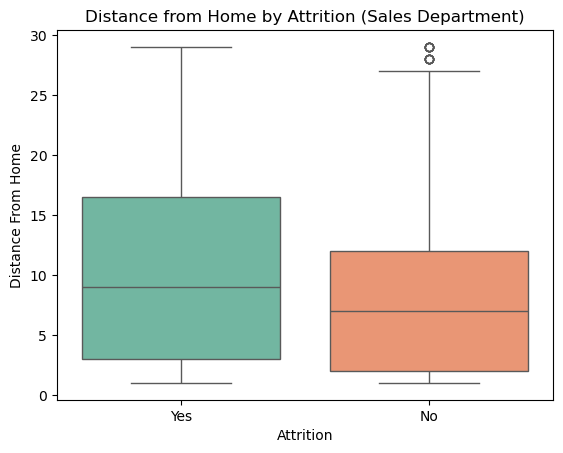

In [34]:
create_boxplot(data=sales_employees, x="Attrition", y="DistanceFromHome", title="Distance from Home by Attrition (Sales Department)", ylabel="Distance From Home")

Employees who left the company tended to live farther from the office than those who stayed. The median commute distance was higher for the attrition group (those that left), and the overall spread of distances was wider as well, ranging from a little less than 5km to a little over 15km.

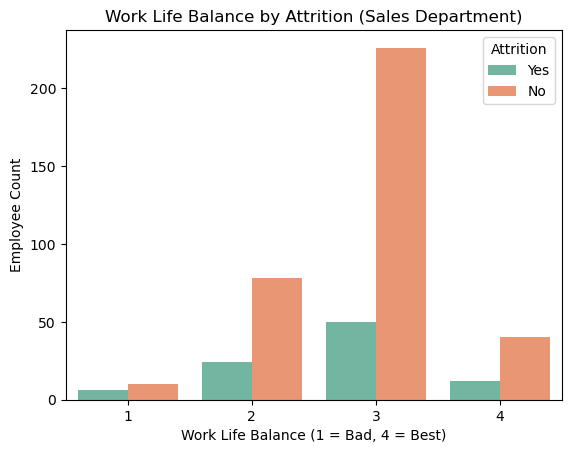

In [35]:
sns.countplot(data=sales_employees, x="WorkLifeBalance", hue="Attrition", palette="Set2")
plt.title("Work Life Balance by Attrition (Sales Department)")
plt.xlabel("Work Life Balance (1 = Bad, 4 = Best)")
plt.ylabel("Employee Count")
plt.show()

Employees who stayed with the company were more likely to report higher work-life balance scores, particularly at level 3. In contrast, those who left the company were more evenly distributed across lower satisfaction levels (1–3), with fewer reporting high satisfaction (4). This suggests that lower work-life balance may be a contributing factor to attrition in the Sales department.

## Summary and Recommendations

This project explored an HR dataset to address the question: *Which departments experience the highest attrition, and what employee-level factors may be contributing to this trend?*

The analysis revealed that the **Sales department has the highest attrition rate** across the company. Further exploration into this department identified several factors associated with higher attrition, including **younger age**, **lower monthly income**, **longer commute distance**, **lower work-life balance ratings**, and **varying education levels**.

These findings suggest that attrition in Sales may be influenced by a combination of personal and workplace-related factors. Organizations may benefit from targeted retention strategies, such as improving flexibility for employees with long commutes, offering competitive compensation, and supporting work-life balance initiatives within this department.